In [98]:
import yaml
from pprint import pprint
from easydict import EasyDict
import argparse
import io
from tqdm import tqdm
import numpy as np
import librosa
from gensim.models import KeyedVectors
import csv
import os
from praatio import textgrid
import fasttext
import h5py

In [16]:
def parse_args():
    parser = argparse.ArgumentParser(description='OHGesture')
    parser.add_argument('--root_input', type=str, required=False, default='./input')
    parser.add_argument('--word2vec_model', type=str, required=False, default="../fasttext/crawl-300d-2M.vec")
    parser.add_argument('--subword_model', type=str, required=False, default="../fasttext/crawl-300d-2M-subword")

    args = parser.parse_args()
    return args

In [50]:
args = argparse.Namespace()
args.root_input = "./input"
args.word2vec_model = "../fasttext/crawl-300d-2M.vec"
args.subword_model = "../fasttext/crawl-300d-2M-subword"

pprint(args)
fps = 20

Namespace(root_input='./input', word2vec_model='../fasttext/crawl-300d-2M.vec', subword_model='../fasttext/crawl-300d-2M-subword')


In [60]:
from word_embedding import load_word2vec_model, load_csv_aligned, word2vec
word2vec_model = load_word2vec_model(args.word2vec_model)

In [156]:
def word_emb(root_input, folder, wav_file, csv_file):
    wav, sr = librosa.load(wav_file, sr=16000)
    audio_length_seconds = len(wav) / sr
    print(wav.shape)
    
    align_sentence = load_csv_aligned(csv_file)
    n_frames = int((len(wav) * fps) // sr)
    print(f"Audio length: {audio_length_seconds} -> {n_frames} frame")
    sentence_vec = word2vec(align_sentence, word2vec_model, n_frames, fps, csv_file)
    
    print(np.shape(sentence_vec), " -> saving ", f"{folder}.npy")
    npy_path = os.path.join(root_input, f"{folder}/{folder}.npy")
    print(f"Saving: {npy_path}")
    np.save(npy_path, sentence_vec)

In [157]:
folders = [folder for folder in sorted(os.listdir(args.root_input)) if folder != ".DS_Store"]

for folder in folders:
    folder_path = os.path.join(args.root_input, folder)
    wave_files = [wav for wav in sorted(os.listdir(folder_path)) if wav.endswith(".wav")]
    csv_files = [csv for csv in sorted(os.listdir(folder_path)) if csv.endswith(".csv")]
    
    if len(wave_files) != len(csv_files):
        assert len(wave_files) == len(csv_files), "Error"
    
    wav_file = f"{args.root_input}/{folder}/{wave_files[0]}"
    csv_file = f"{args.root_input}/{folder}/{csv_files[0]}"
    
    # print(wav_file, csv_file)
    word_emb(args.root_input, folder, wav_file, csv_file)
    # print(folder, csv_files)
    # break

(1942933,)
Audio length: 121.4333125 -> 2428 frame
embedding shape (2428, 300)
(2428, 300)  -> saving  001_Neutral_0_x_1_0.npy
Saving: ./input/001_Neutral_0_x_1_0/001_Neutral_0_x_1_0.npy
(2079733,)
Audio length: 129.9833125 -> 2599 frame
embedding shape (2599, 300)
(2599, 300)  -> saving  003_Neutral_2_x_1_0.npy
Saving: ./input/003_Neutral_2_x_1_0/003_Neutral_2_x_1_0.npy
(2225600,)
Audio length: 139.1 -> 2782 frame
embedding shape (2782, 300)
(2782, 300)  -> saving  006_Sad_0_x_1_0.npy
Saving: ./input/006_Sad_0_x_1_0/006_Sad_0_x_1_0.npy
(2562133,)
Audio length: 160.1333125 -> 3202 frame
embedding shape (3202, 300)
(3202, 300)  -> saving  008_Sad_2_x_1_0.npy
Saving: ./input/008_Sad_2_x_1_0/008_Sad_2_x_1_0.npy
(2098400,)
Audio length: 131.15 -> 2623 frame
embedding shape (2623, 300)
(2623, 300)  -> saving  011_Happy_0_x_1_0.npy
Saving: ./input/011_Happy_0_x_1_0/011_Happy_0_x_1_0.npy
(1969067,)
Audio length: 123.0666875 -> 2461 frame
embedding shape (2461, 300)
(2461, 300)  -> saving  013

In [50]:
os.listdir("")

In [158]:
npy_load = np.load("/Users/thanh/OpenHuman/OHGesture/main/input/028_Angry_2_x_1_0/028_Angry_2_x_1_0.npy")

In [159]:
npy_load.shape

(2240, 300)

In [163]:
np.min(npy_load)

-1.0190999507904053

In [80]:
batch_size, frame_length, feature_dim = 10000, 88, 1141
data = np.random.rand(batch_size, frame_length, feature_dim)

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

In [108]:
# Assuming `data` is your dataset with shape [10000, 88, 1141]
batch_size, frame_length, feature_dim = 100, 88, 1141

# Generate random emotion labels for demonstration
emotion_labels = np.random.choice(['Happy', 'Sad', 'Neutral', 'Relaxed', 'Old', 'Angry'], size=batch_size)

# Generate random data for demonstration
data = np.random.rand(batch_size, frame_length, feature_dim)

# Flatten the data for t-SNE
data_reshaped = data.reshape(batch_size, -1)  # Shape will be [10000, 88 * 1141]

In [122]:
def tsne_visualization(data_reshaped, emotion_labels):
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data_reshaped)
    
    # Convert t-SNE results to a pandas DataFrame for easier plotting with seaborn
    tsne_df = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])
    tsne_df['Emotion'] = emotion_labels  # Add emotion labels
    
    # Plotting with seaborn and adding labels
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Component 1', y='Component 2', hue='Emotion', data=tsne_df, s=50)
    
    # Add labels to each data point
    # for i in range(len(tsne_df)):
    #     plt.text(tsne_df['Component 1'][i], tsne_df['Component 2'][i], str(i), fontsize=10, ha='right', va='bottom')
    
    plt.title('t-SNE Visualization with Emotion Labels')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Emotion')
    plt.show()


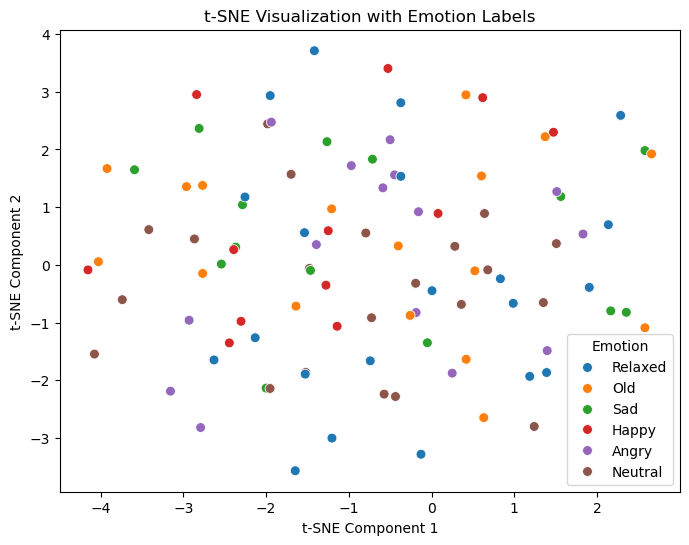

In [123]:
tsne_visualization(data_reshaped, emotion_labels)

In [101]:
h5_dataset_file = "../ZeroEGGSProcessing/h5dataset/datasets_train.h5"

with h5py.File(h5_dataset_file, 'r') as h5:
    dataset_keys = list(h5.keys())
    all_gestures = [h5[key]["gesture"][:] for key in h5.keys()]

In [103]:
np.shape(all_gestures)

(1294, 88, 1141)

In [104]:
gestures = np.asarray(all_gestures)

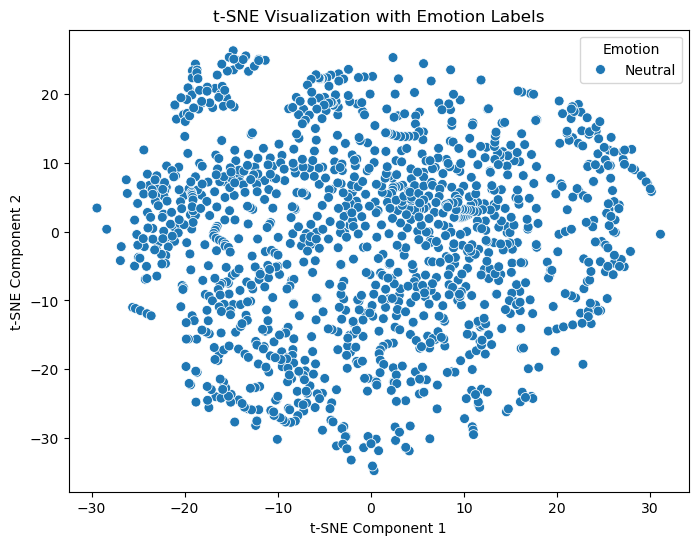

In [138]:
gestures_reshape = gestures.reshape(gestures.shape[0], -1)
batch_size, frame_length, feature_dim = gestures.shape
emotion_keys = [keys.split("_")[2] for keys in dataset_keys]
len(emotion_keys)

tsne_visualization(gestures_reshape, emotion_keys)

In [164]:
folders

['001_Neutral_0_x_1_0',
 '003_Neutral_2_x_1_0',
 '006_Sad_0_x_1_0',
 '008_Sad_2_x_1_0',
 '011_Happy_0_x_1_0',
 '013_Happy_2_x_1_0',
 '016_Relaxed_0_x_1_0',
 '018_Relaxed_2_x_1_0',
 '021_Old_0_x_1_0',
 '023_Old_2_x_1_0',
 '026_Angry_0_x_1_0',
 '028_Angry_2_x_1_0']